Sharper the image, more variance in the edge detected image (since edges are sharp, and sudden intensities are more compared to blurred image, so the variance will be much more (keeping threshold as 10 for now)).

In [43]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sb

Blank Image


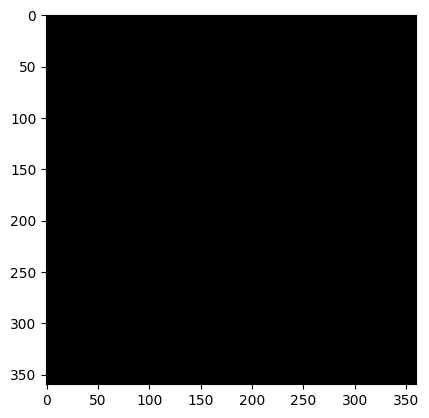

In [44]:
IMG_DIMS = (360,360)
CENTER = (IMG_DIMS[0]//2, IMG_DIMS[1]//2)
RADIUS = 160

WHITE = (255, 255, 255)

image = np.zeros(IMG_DIMS, dtype=np.uint8)

print("Blank Image")
plt.imshow(image, cmap='gray')

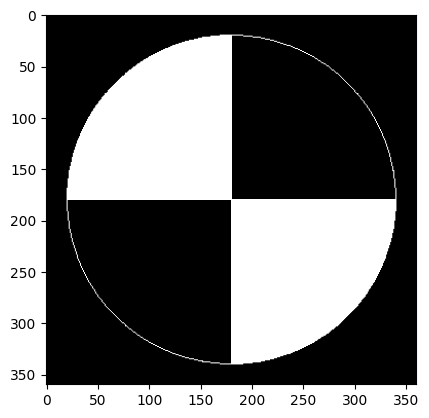

In [45]:
# Draw Quadrants.
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=0, endAngle=90, color=WHITE)
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=90, endAngle=180, color=WHITE)
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=180, endAngle=270, color=WHITE)
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=270, endAngle=360, color=WHITE)

# Draw lines to seperate quadrants.
image = cv2.line(image, (IMG_DIMS[0]//2 - 160, IMG_DIMS[1]//2), (IMG_DIMS[0]//2 + 160, IMG_DIMS[1]//2), color=WHITE)
image = cv2.line(image, (IMG_DIMS[0]//2, IMG_DIMS[1]//2 - RADIUS), (IMG_DIMS[0]//2, IMG_DIMS[1]//2 + RADIUS), color=WHITE)

# Fill in colors.
cv2.floodFill(image, None, (IMG_DIMS[0]//2 - 80, IMG_DIMS[1]//2 - RADIUS//2), 255)
cv2.floodFill(image, None, (IMG_DIMS[0]//2 + 80, IMG_DIMS[1]//2 + RADIUS//2), 255)
plt.imshow(image, cmap='gray')

average blur filter :  1 x 1


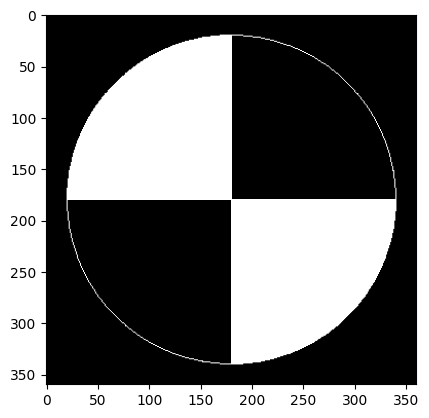

laplacian filtered


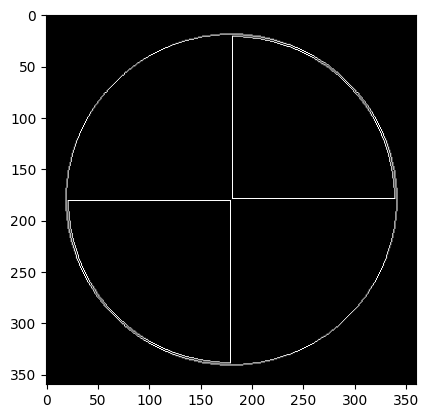

Histogram


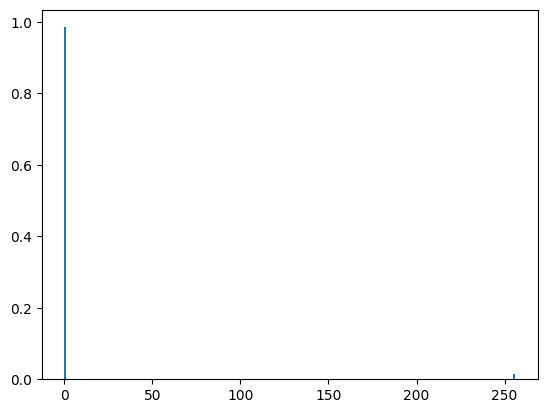

variance :  983.123648351766
Sharp image

average blur filter :  5 x 5


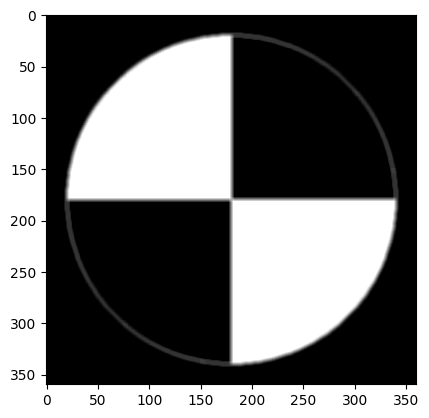

laplacian filtered


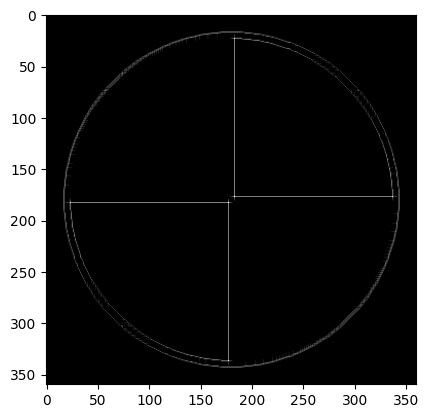

Histogram


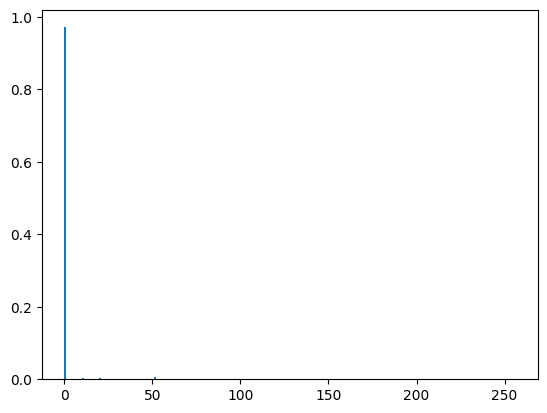

variance :  26.95782392523053
Lightly blurred

average blur filter :  9 x 9


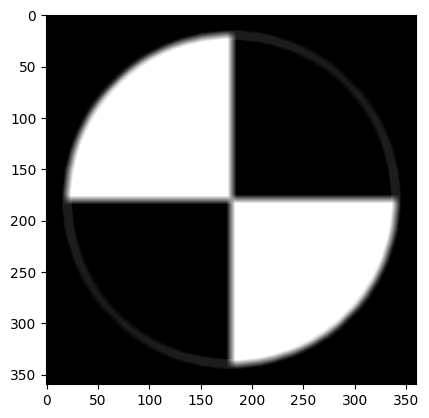

laplacian filtered


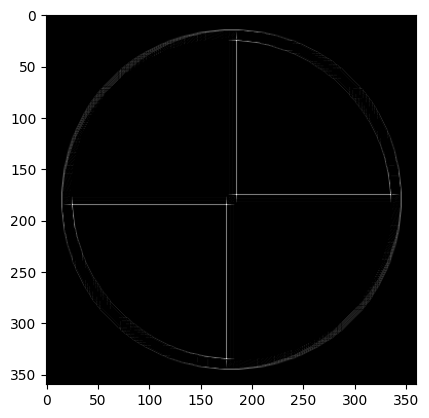

Histogram


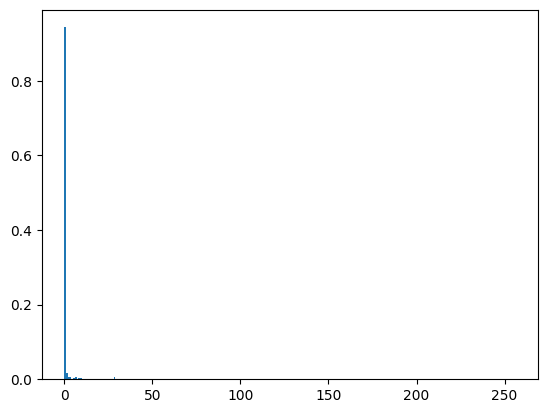

variance :  6.398638431403368
Heavily Blurred

average blur filter :  13 x 13


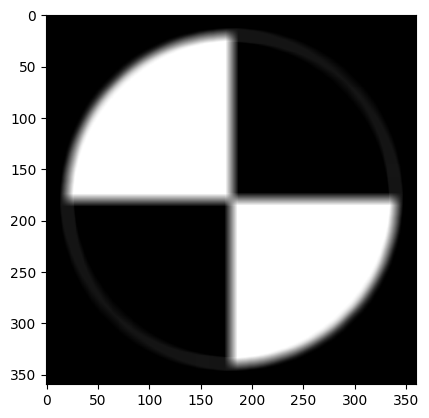

laplacian filtered


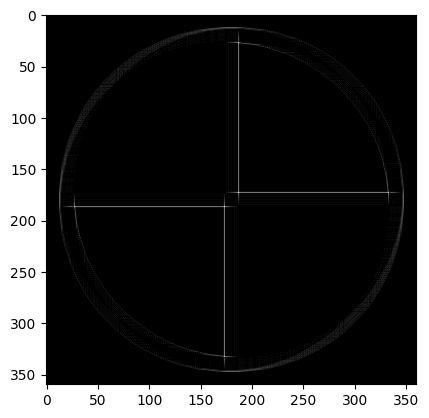

Histogram


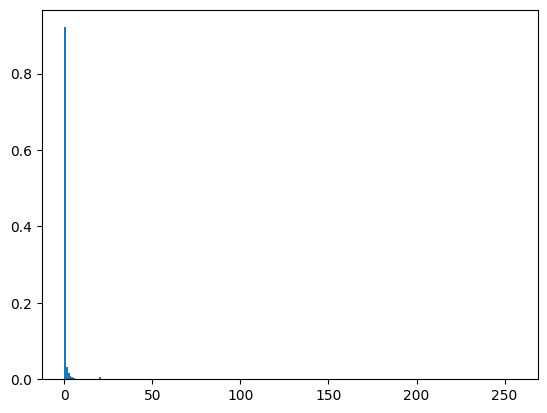

variance :  2.8765161713153486
Extremely blurred

average blur filter :  17 x 17


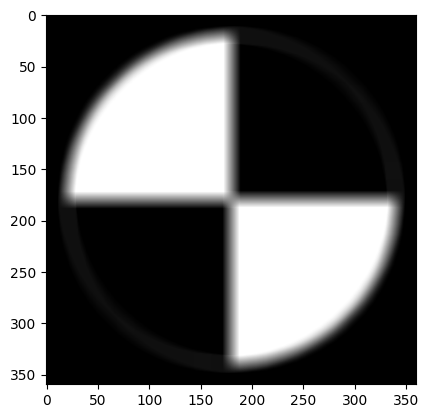

laplacian filtered


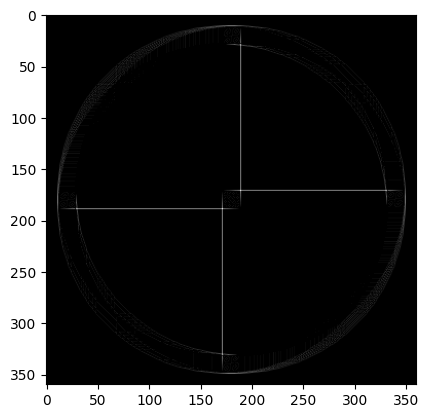

Histogram


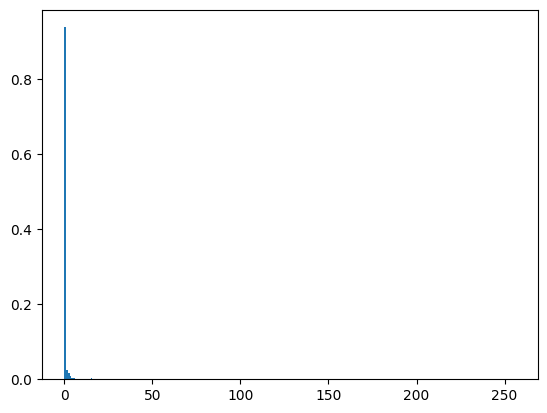

variance :  1.5246387457609354
Extremely blurred

average blur filter :  21 x 21


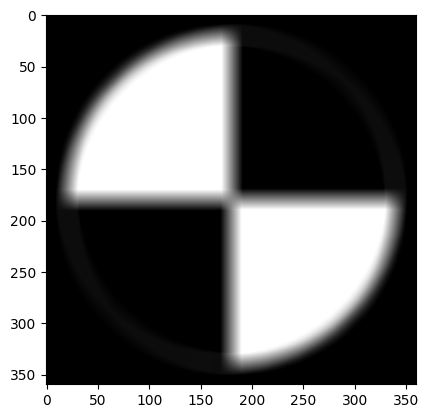

laplacian filtered


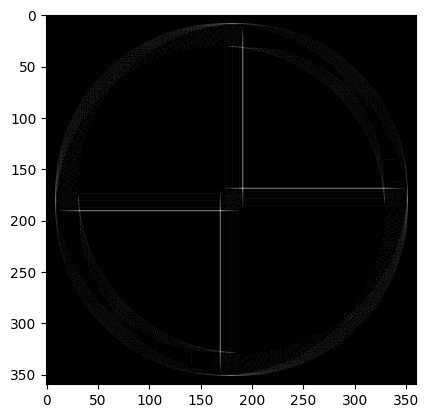

Histogram


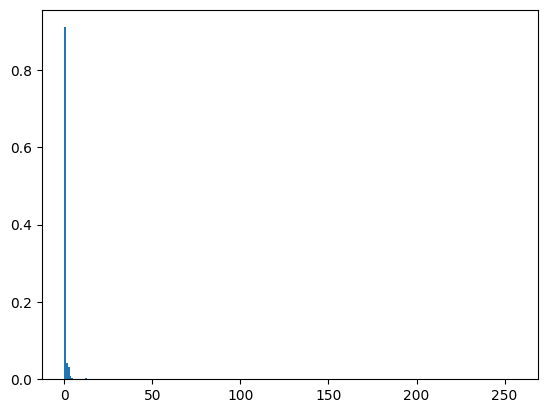

variance :  1.0287860758649594
Extremely blurred

average blur filter :  25 x 25


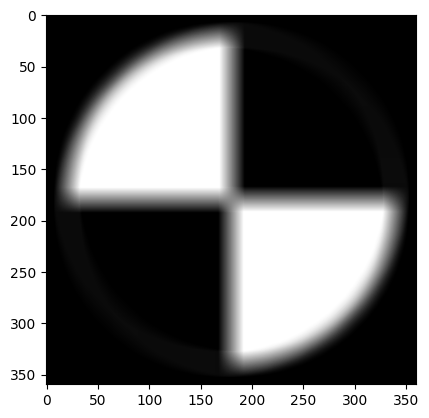

laplacian filtered


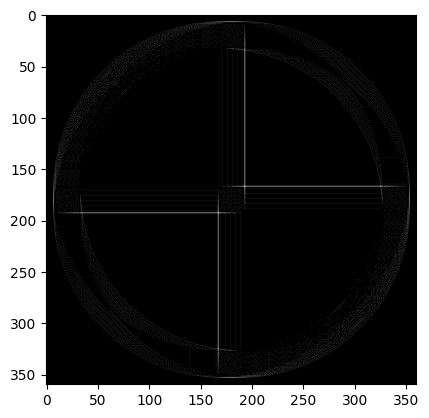

Histogram


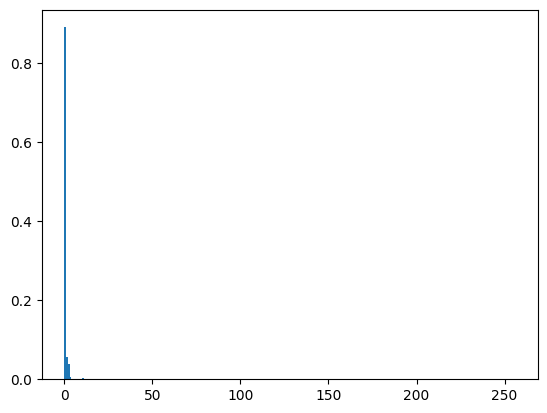

variance :  0.7790759256877761
Max blurred image
Extremely blurred

average blur filter :  29 x 29


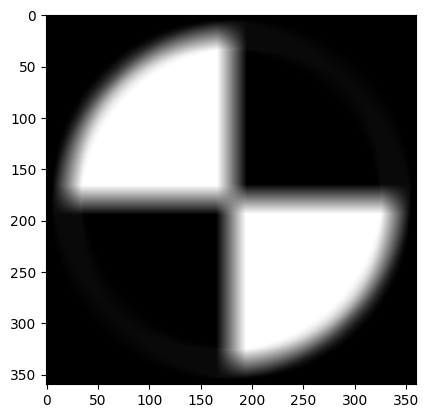

laplacian filtered


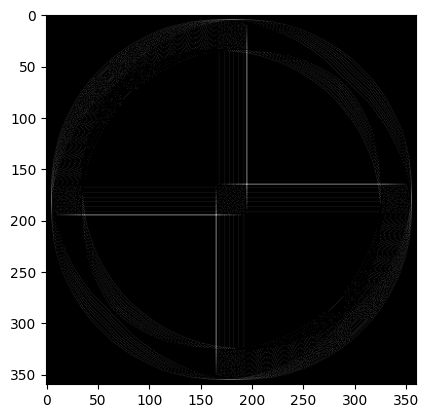

Histogram


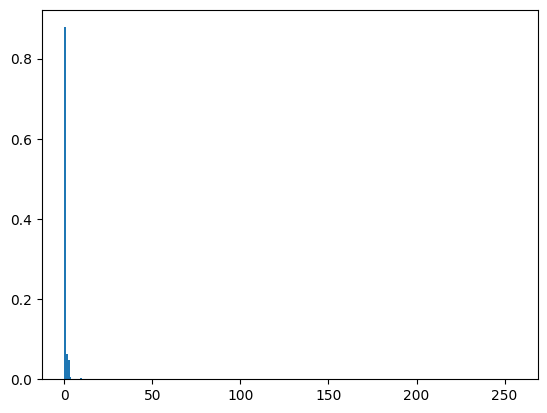

variance :  0.6617481138545956
Max blurred image
Extremely blurred



In [48]:
for i in range(1,30,4):
    average_blurred_image = cv2.blur(image, (i, i))

    print('average blur filter : ', i ,'x',i)
    plt.imshow(average_blurred_image, cmap='gray')
    plt.show()

    laplacian = cv2.Laplacian(average_blurred_image, -1)
    print('laplacian filtered')
    plt.imshow(laplacian, cmap='gray')
    plt.show()

    print('Histogram')
    plt.hist(laplacian.ravel(),256,[0,256], density=True)
    plt.show()



    edge_variance = laplacian.var()
    print('variance : ', edge_variance)
    if (edge_variance < 1):
        print('Max blurred image')
    if (edge_variance < 5):
        print('Extremely blurred')
    elif (edge_variance < 10):
        print('Heavily Blurred')
    elif (edge_variance < 30):
        print('Lightly blurred')
    else:
        print('Sharp image')

    print()